In [1]:
import pandas as pd

# Load data
file_path = "CENSUS_INCOME.csv"
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display first few rows after encoding
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Print missing values count per column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE COUNTRY    0
INCOME            0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numeric_cols = ['AGE', 'FNLWGT', 'EDUCATION-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK']
scaler = StandardScaler()

# Apply standardization
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display first few rows after scaling
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


In [5]:
# Display summary statistics
summary_stats = data.describe()

summary_stats

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000
mean,-2.705915e-17,3.868892,-1.001625e-16,10.298210,1.471887e-16,2.611836,6.572740,1.446362,3.665858,0.669205,1.309314e-17,1.016900e-16,-1.549355e-17,36.718866,0.240810
std,1.000015e+00,1.455960,1.000015e+00,3.870264,1.000015e+00,1.506222,4.228857,1.606771,0.848806,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,7.823782,0.427581
min,-1.582206e+00,0.000000,-1.681631e+00,0.000000,-3.529656e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000,0.000000
25%,-7.757679e-01,4.000000,-6.816910e-01,9.000000,-4.200596e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000,0.000000
50%,-1.159546e-01,4.000000,-1.082193e-01,11.000000,-3.136003e-02,2.000000,7.000000,1.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000,0.000000
75%,6.904838e-01,4.000000,4.478765e-01,12.000000,7.460392e-01,4.000000,10.000000,3.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,39.000000,0.000000
max,3.769612e+00,8.000000,1.226856e+01,15.000000,2.300838e+00,6.000000,14.000000,5.000000,4.000000,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,41.000000,1.000000


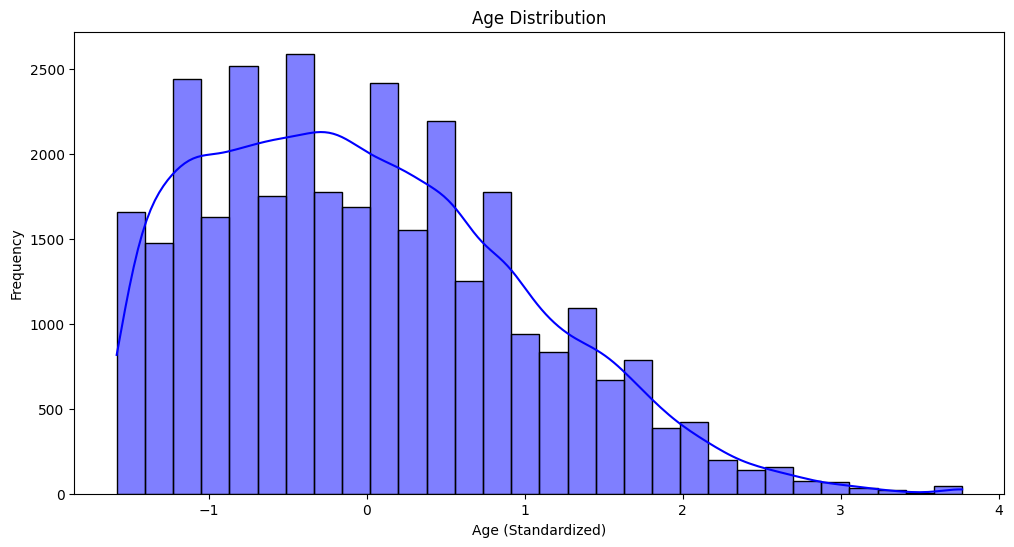

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age (Standardized)")
plt.ylabel("Frequency")
plt.show()


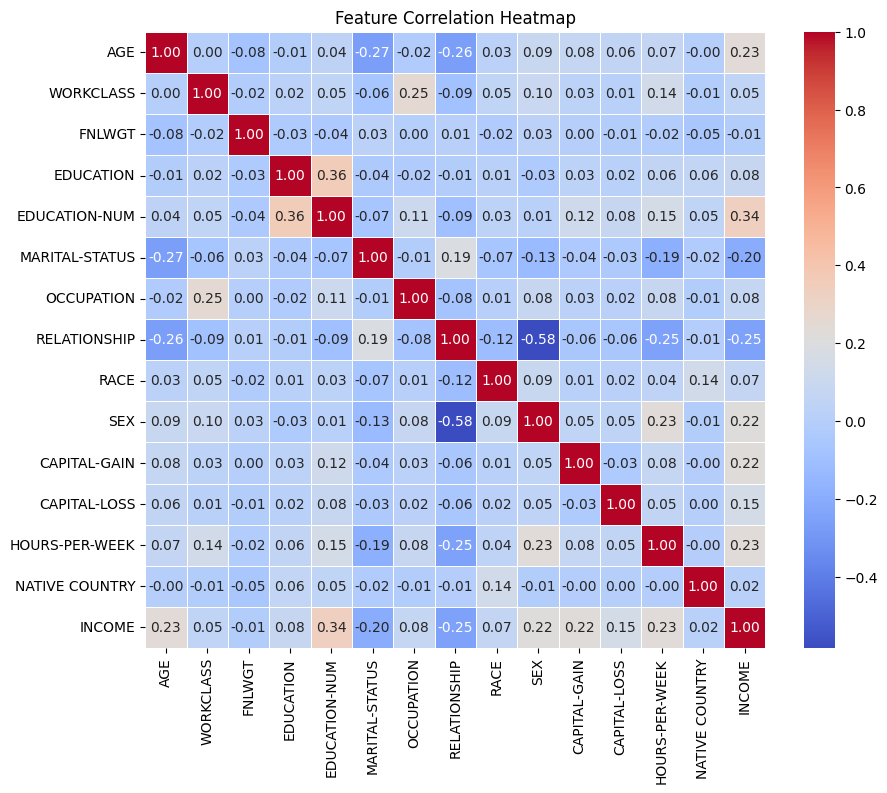

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-8-ef9ae5f8dd04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['INCOME'], y=data['AGE'], palette="coolwarm")


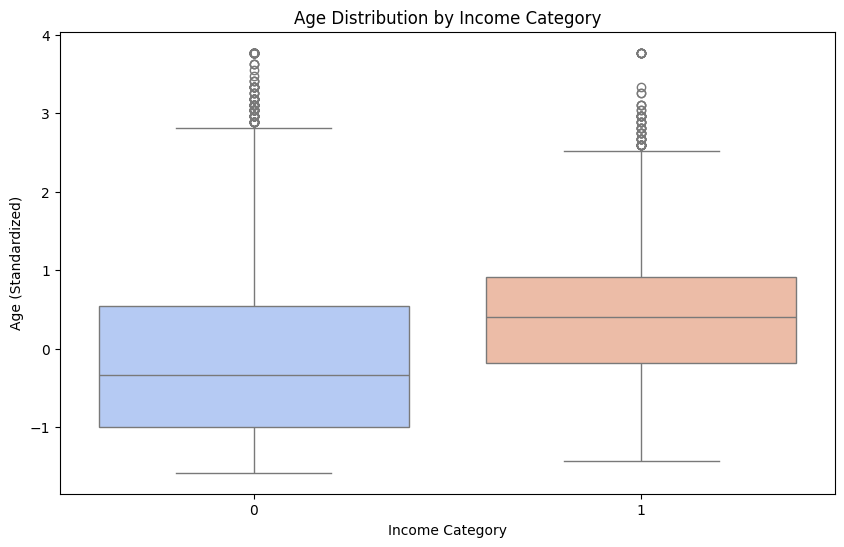

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['INCOME'], y=data['AGE'], palette="coolwarm")
plt.title("Age Distribution by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Age (Standardized)")
plt.show()


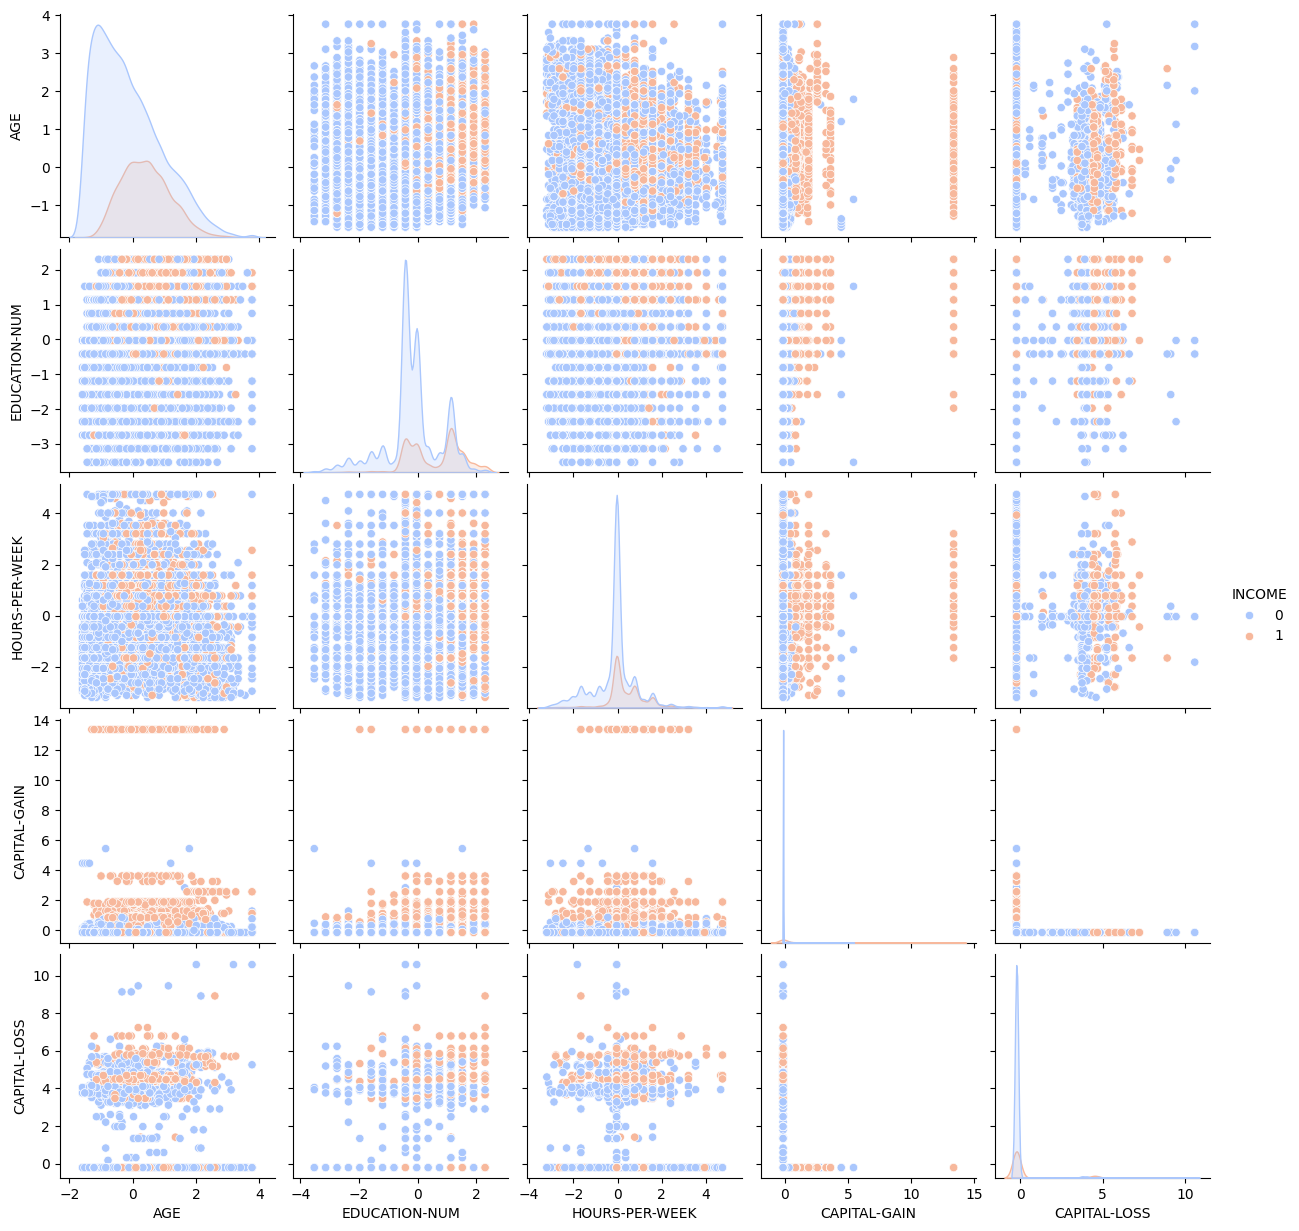

In [9]:
sns.pairplot(data[['AGE', 'EDUCATION-NUM', 'HOURS-PER-WEEK', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'INCOME']], hue='INCOME', palette="coolwarm")
plt.show()


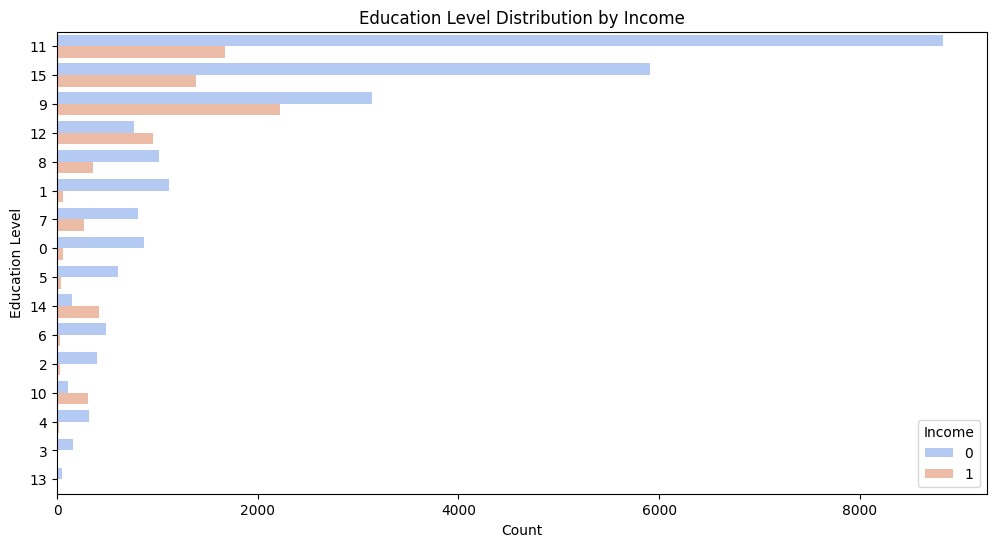

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data['EDUCATION'], hue=data['INCOME'], palette="coolwarm", order=data['EDUCATION'].value_counts().index)
plt.title("Education Level Distribution by Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()


# model Implementation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time

# Split features and target
X = data.drop("INCOME", axis=1)
y = data["INCOME"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train SVM model
svm_model = SVC(kernel='linear', C=1.0, probability=True)
svm_model.fit(X_train, y_train)

# Predict with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
print("=== SVM Results ===")
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))


=== SVM Results ===
Accuracy: 0.81759557807462
Confusion Matrix:
 [[4813  129]
 [1059  512]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4942
           1       0.80      0.33      0.46      1571

    accuracy                           0.82      6513
   macro avg       0.81      0.65      0.68      6513
weighted avg       0.81      0.82      0.79      6513



In [14]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=1)

# Predict with ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate ANN
print("\n=== ANN Results ===")
print('Accuracy:', accuracy_score(y_test, y_pred_ann))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ann))
print('Classification Report:\n', classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7911 - loss: 0.4565
Epoch 2/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8304 - loss: 0.3540
Epoch 3/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8334 - loss: 0.3503
Epoch 4/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8449 - loss: 0.3319
Epoch 5/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8462 - loss: 0.3302
Epoch 6/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8442 - loss: 0.3315
Epoch 7/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8457 - loss: 0.3275
Epoch 8/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8464 - loss: 0.3264
Epoch 9/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8460 - loss: 0.3239
Epoch 10/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8481 - loss: 0.3209
Epoch 11/25
1628/1628 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8485 - loss: 0.3221
Epoch 12/25
1628/1628 ━━━━━━━━

In [23]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("\n=== Decision Tree Results ===")
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))



=== Decision Tree Results ===
Accuracy: 0.8142177184093352
Confusion Matrix:
 [[4320  622]
 [ 588  983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



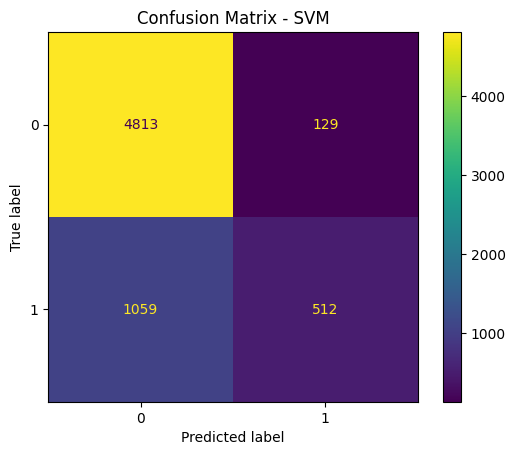

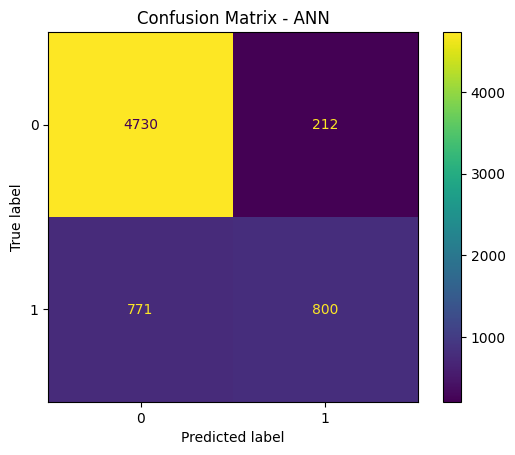

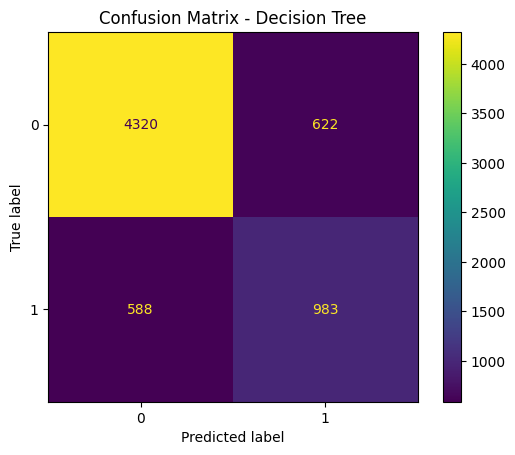

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("Confusion Matrix - SVM")
plt.show()

# Plot Confusion Matrix for ANN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann)
plt.title("Confusion Matrix - ANN")
plt.show()

# Plot Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
AUC - SVM: 0.8516933925580014
AUC - ANN: 0.9067179279643869
AUC - Decision Tree: 0.7499280643368871


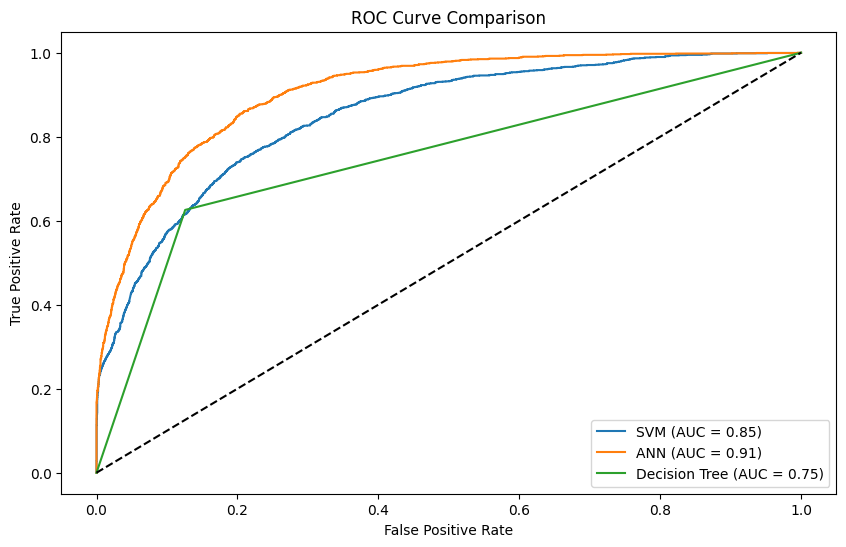

In [31]:

from sklearn.metrics import roc_curve, auc

# Get probabilities
y_score_svm = svm_model.predict_proba(X_test)[:, 1]
y_score_ann = ann_model.predict(X_test).ravel()
y_score_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_score_ann)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)

# Calculate AUC
auc_svm = auc(fpr_svm, tpr_svm)
auc_ann = auc(fpr_ann, tpr_ann)
auc_dt = auc(fpr_dt, tpr_dt)

# Print AUC values
print("AUC - SVM:", auc_svm)
print("AUC - ANN:", auc_ann)
print("AUC - Decision Tree:", auc_dt)

# Plot ROC Curves
plt.figure(figsize=(10,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


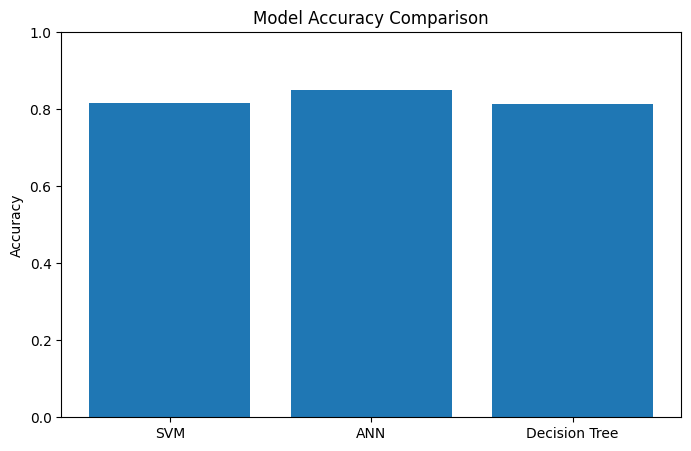

In [30]:
# Calculate accuracies
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_ann = accuracy_score(y_test, y_pred_ann)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Plot Accuracies
models = ['SVM', 'ANN', 'Decision Tree']
accuracies = [acc_svm, acc_ann, acc_dt]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [16]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define parameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Predict with the best Decision Tree
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree
print("\n=== Tuned Decision Tree Results ===")
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))



=== Tuned Decision Tree Results ===
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.8569015814524796
Confusion Matrix:
 [[4533  409]
 [ 523 1048]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4942
           1       0.72      0.67      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.85      0.86      0.86      6513



  0%|          | 0/100 [00:00<?, ?it/s]

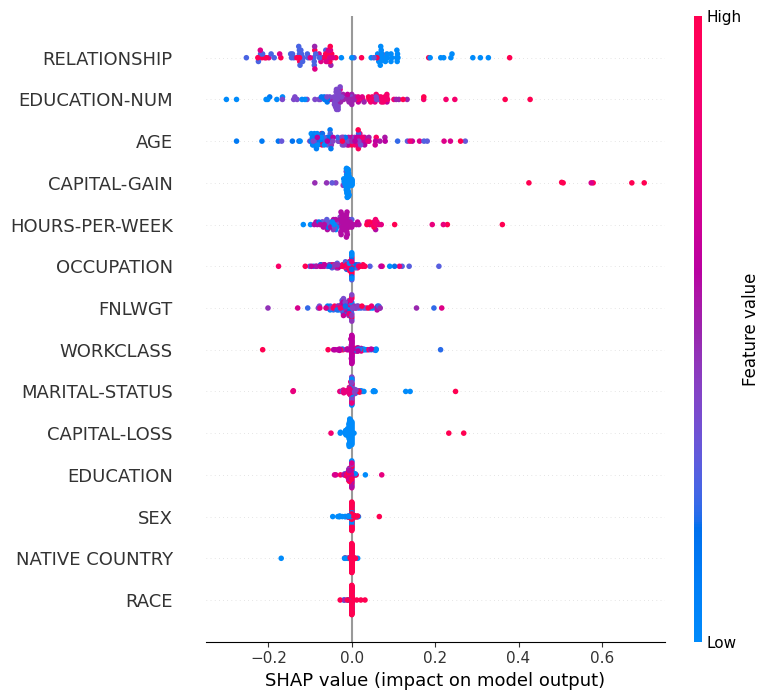

In [24]:
# Import shap
import shap

# Use KernelExplainer (works for any model)
explainer_dt = shap.KernelExplainer(dt_model.predict, shap.sample(X_train, 100))
shap_values_dt = explainer_dt.shap_values(X_test[:100])

# Plot SHAP summary for Decision Tree
shap.summary_plot(shap_values_dt, X_test[:100])


<Figure size 640x480 with 0 Axes>

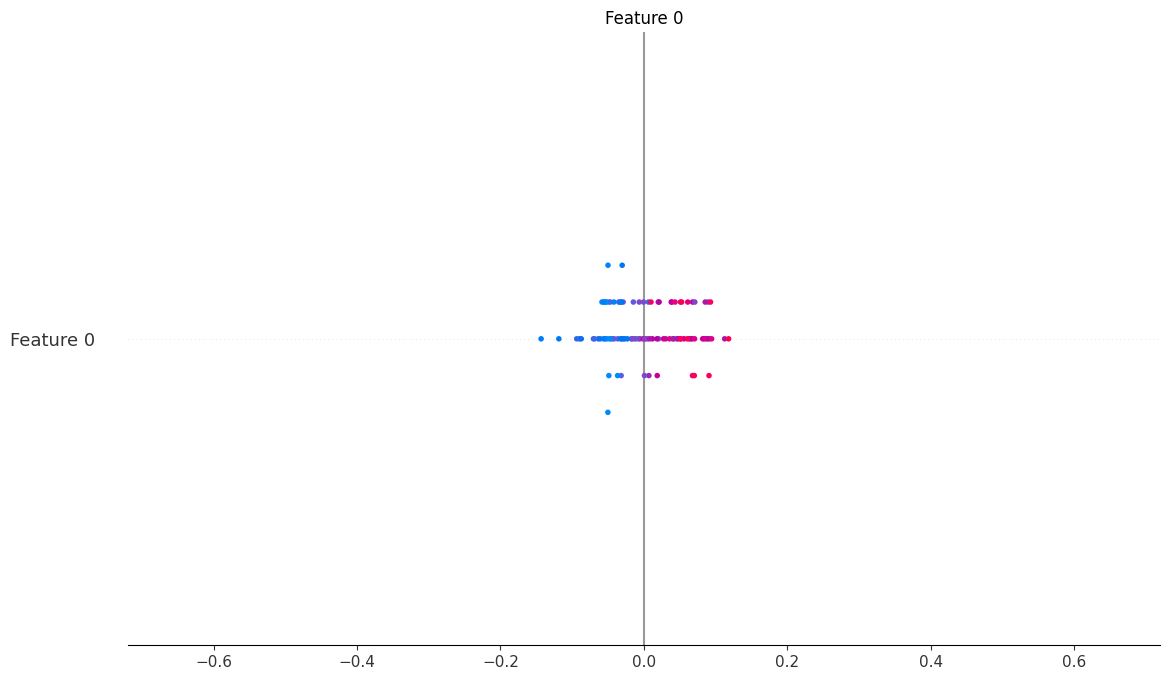

In [26]:
# Import shap
import shap

# Convert X_train and X_test to numpy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# Use DeepExplainer for ANN
explainer_ann = shap.DeepExplainer(ann_model, X_train_array[:100])  # Use numpy array now
shap_values_ann = explainer_ann.shap_values(X_test_array[:100])

# Plot SHAP summary
shap.summary_plot(shap_values_ann, X_test_array[:100])
